In [69]:
# 1. Download the dataset: Dataset
# 2. Load the dataset into the tool.
# 3. Perform Below Visualizations.
# ∙ Univariate Analysis
# ∙ Bi- Variate Analysis
# ∙ Multi-Variate Analysis
# 4. Perform descriptive statistics on the dataset.
# 5. Check for Missing values and deal with them.
# 6. Find the outliers and replace them outliers
# 7. Check for Categorical columns and perform encoding.
# 8. Scaling the data
# 9. Perform any of the clustering algorithms

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
# Loading Dataset
df = pd.read_csv('Mall_Customers.csv')

In [72]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
# Change column names
df.columns = ['id', 'gender', 'age', 'income', 'score']

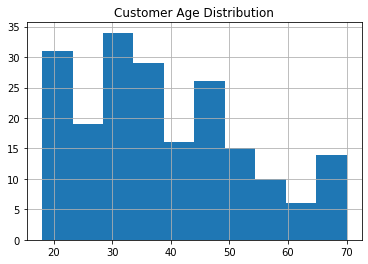

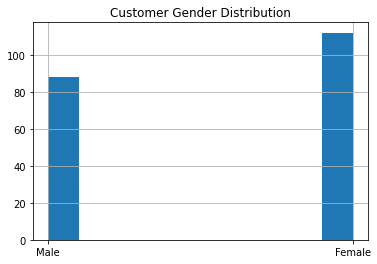

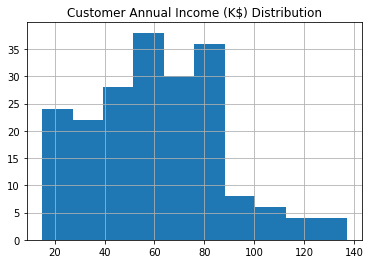

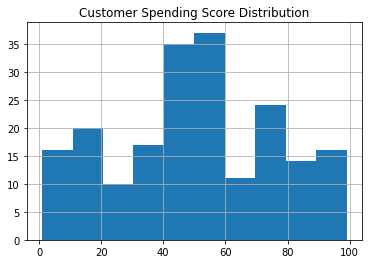

In [74]:
# Univariate analysis
df.age.hist()
plt.title('Customer Age Distribution')
plt.show()
df.gender.hist()
plt.title('Customer Gender Distribution')
plt.show()
df.income.hist()
plt.title('Customer Annual Income (K$) Distribution')
plt.show()
df.score.hist()
plt.title('Customer Spending Score Distribution')
plt.show()

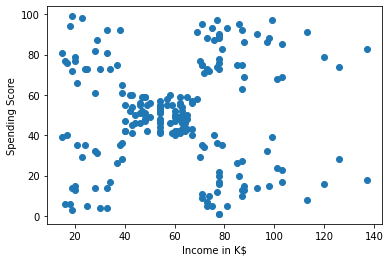

In [75]:
# Bivariate analysis
# Income Vs Spending Score
plt.scatter(df.income, df.score)
plt.xlabel('Income in K$')
plt.ylabel('Spending Score')
plt.show()

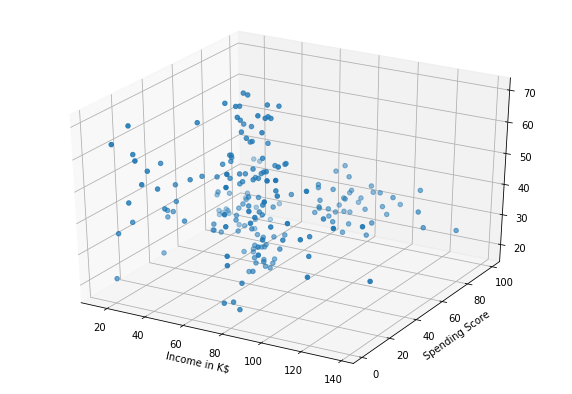

In [76]:
# Multivariate Analysis
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(df.income, df.score, df.age)
plt.xlabel('Income in K$')
plt.ylabel('Spending Score')
plt.show()

In [77]:
# Descriptive Statistics
df.describe()

,id,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [78]:
# Missing Values
# There are no missing values in this dataset.

In [79]:
# Categorical Encoding
df.gender = df.gender.astype('category').cat.codes

In [82]:
df.describe()

,id,gender,age,income,score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [85]:
# Handling outliers
df = df[(df.income > df.income.quantile(0.05)) & (df.income < df.income.quantile(0.95))]

In [57]:
# Normalization of data
df.income = (df.income - df.income.mean())/df.income.std()
df.score = (df.score - df.score.mean())/df.score.std()
df.age = (df.age - df.age.mean())/df.age.std()

In [62]:
df

,id,gender,age,income,score
0,1,1,-1.421003,-1.734646,-0.433713
1,2,1,-1.277829,-1.734646,1.192711
2,3,0,-1.349416,-1.696572,-1.711618
3,4,0,-1.134655,-1.696572,1.037814
4,5,0,-0.561958,-1.658498,-0.394989
...,...,...,...,...,...
195,196,0,-0.275610,2.263112,1.115262
196,197,0,0.440260,2.491555,-0.859681
197,198,1,-0.490371,2.491555,0.921640
198,199,1,-0.490371,2.910368,-1.246925


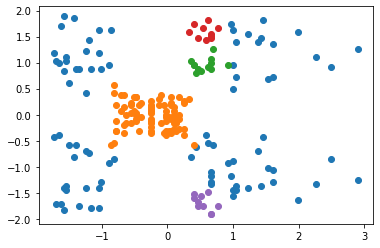

In [67]:
# dbscan clustering
from numpy import unique, where, array
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.30, min_samples=9)
X = array(df[['income', 'score']])
yhat = model.fit_predict(X)
clusters = unique(yhat)
for cluster in clusters:
	row_ix = where(yhat == cluster)
	plt.scatter(X[row_ix, 0], X[row_ix, 1])